Kelompok : Siti Uswah Hasanah // 1301204019

### Install TPOT

In [4]:
pip install tpot

### import library

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from tpot import TPOTClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tpot import TPOTClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from google.colab import drive
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Eksplorasi Data

In [6]:
# import pandas as pd
# import requests
# from scipy.io import arff

# # URL file ARFF
# url = "https://github.com/nanahsn/Pembelajaran-Mesin-Lanjut/raw/main/dataset_56_vote.arff"

# # Mengambil konten file ARFF dari URL
# response = requests.get(url)
# arff_content = response.content.decode('utf-8')

# # Simpan konten ARFF ke file lokal
# arff_filename = 'file_input.arff'
# with open(arff_filename, 'w') as f:
#     f.write(arff_content)

# # Baca file ARFF menggunakan scipy
# data, meta = arff.loadarff(arff_filename)

# # Ubah ke dalam pandas DataFrame
# df = pd.DataFrame(data)

# # Ganti 'file_output.csv' dengan nama file CSV yang diinginkan
# csv_file = 'file_output.csv'

# # Simpan DataFrame sebagai file CSV
# df.to_csv(csv_file, index=False)


### Read dataset


In [7]:
url = "https://raw.githubusercontent.com/nanahsn/Pembelajaran-Mesin-Lanjut/main/file_output.csv"
df = pd.read_csv(url)

df.head()


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,b'n',b'y',b'n',b'y',b'y',b'y',b'n',b'n',b'n',b'y',b'?',b'y',b'y',b'y',b'n',b'y',b'republican'
1,b'n',b'y',b'n',b'y',b'y',b'y',b'n',b'n',b'n',b'n',b'n',b'y',b'y',b'y',b'n',b'?',b'republican'
2,b'?',b'y',b'y',b'?',b'y',b'y',b'n',b'n',b'n',b'n',b'y',b'n',b'y',b'y',b'n',b'n',b'democrat'
3,b'n',b'y',b'y',b'n',b'?',b'y',b'n',b'n',b'n',b'n',b'y',b'n',b'y',b'n',b'n',b'y',b'democrat'
4,b'y',b'y',b'y',b'n',b'y',b'y',b'n',b'n',b'n',b'n',b'y',b'?',b'y',b'y',b'y',b'y',b'democrat'


### Data Info


In [8]:
# Menghitung banyaknya data yang ada pada dataset
print("Banyak Data : ",len(df))

Banyak Data :  435


In [9]:
# Menampilkan type data tiap fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   handicapped-infants                     435 non-null    object
 1   water-project-cost-sharing              435 non-null    object
 2   adoption-of-the-budget-resolution       435 non-null    object
 3   physician-fee-freeze                    435 non-null    object
 4   el-salvador-aid                         435 non-null    object
 5   religious-groups-in-schools             435 non-null    object
 6   anti-satellite-test-ban                 435 non-null    object
 7   aid-to-nicaraguan-contras               435 non-null    object
 8   mx-missile                              435 non-null    object
 9   immigration                             435 non-null    object
 10  synfuels-corporation-cutback            435 non-null    object
 11  educat

### Pengisian Fitur


In [10]:
# Menghitung data yang bernilai tidak null pada suatu kolom
features_fill = pd.DataFrame(100 * df.count().sort_values() / df.shape[0])
features_fill.reset_index(inplace=True)
features_fill.columns = ['Features', 'Fill (%)']

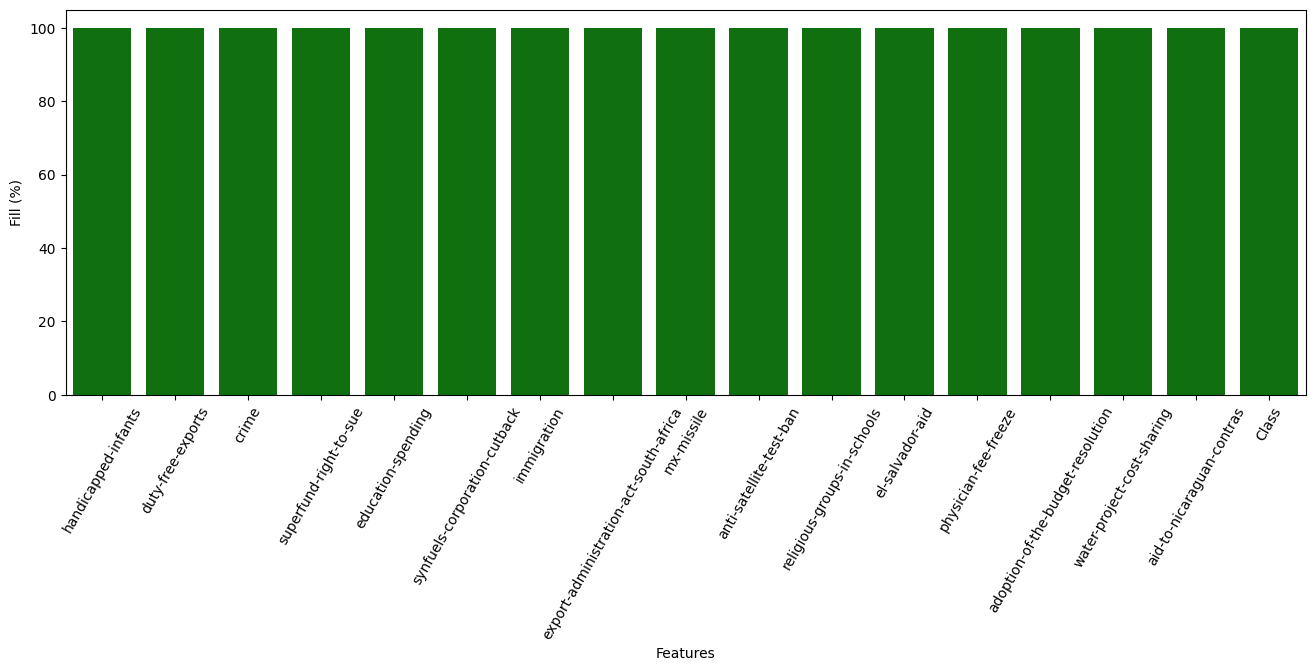

In [11]:
# Visualisasi banyak data yang tidak null pada suatu kolom dalam bentuk persen
plt.figure(figsize=(16, 5))
sns.barplot(x = 'Features', y = 'Fill (%)', data = features_fill, color = 'green')
plt.xticks(rotation=60)
plt.show()


In [12]:
# Menampilkan missing value
df.isna().sum()

handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
Class                                     0
dtype: int64

In [13]:
#Data Kategorikal
print('Data berjenis Kategorikal')
df.select_dtypes('object').columns

Data berjenis Kategorikal


Index(['handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa', 'Class'],
      dtype='object')

In [14]:
#Data Numerical
print('Data berjenis Numerical')
df.select_dtypes('float64').columns

Data berjenis Numerical


Index([], dtype='object')

# Preprocessing data

### Duplikat data


In [62]:
# Copy dataframe
df_new = df.copy()

# Drop data yang redundan
df_new = df_new.drop_duplicates()

# Reset index
df_new.reset_index(drop=True, inplace=True)
data = df_new
df_new

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2,b'republican'
1,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0,b'republican'
2,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1,b'democrat'
3,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2,b'democrat'
4,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2,b'democrat'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,1,1,2,2,2,2,1,1,2,2,1,2,2,2,1,2,b'republican'
338,1,1,2,1,1,1,2,2,2,2,1,1,1,1,1,2,b'democrat'
339,1,0,1,2,2,2,1,1,1,1,2,2,2,2,1,2,b'republican'
340,1,1,1,2,2,2,0,0,0,0,1,2,2,2,1,2,b'republican'


### Heatmap Correlation


In [63]:
# Mengganti nilai b'?' menjadi NaN (missing value)
df_new.replace("b'?'", float('nan'), inplace=True)

# Membuat dictionary untuk mapping b'n' dan b'y' ke nilai float
mapping = {"b'n'": 0.0, "b'y'": 1.0}

# Loop untuk mengubah nilai b'n' dan b'y' menjadi float
for col in df_new.columns[:-1]:  # Mengabaikan kolom 'Class'
    if col != 'Class':
        df_new[col].replace(mapping, inplace=True)

# Tampilkan hasil
df_new.head()


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2,b'republican'
1,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0,b'republican'
2,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1,b'democrat'
3,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2,b'democrat'
4,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2,b'democrat'


In [64]:
# Mengubah kolom menjadi tipe data kategorikal
categorical_columns = ['handicapped-infants', 'water-project-cost-sharing','aid-to-nicaraguan-contras', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']  # masukkan semua nama kolom di sini
df_new[categorical_columns] = df_new[categorical_columns].astype('float64')

In [65]:
df_new

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0,1.0,2.0,b'republican'
1,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,b'republican'
2,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,b'democrat'
3,1.0,2.0,2.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,b'democrat'
4,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,b'democrat'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,b'republican'
338,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,b'democrat'
339,1.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,b'republican'
340,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0,2.0,b'republican'


In [66]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

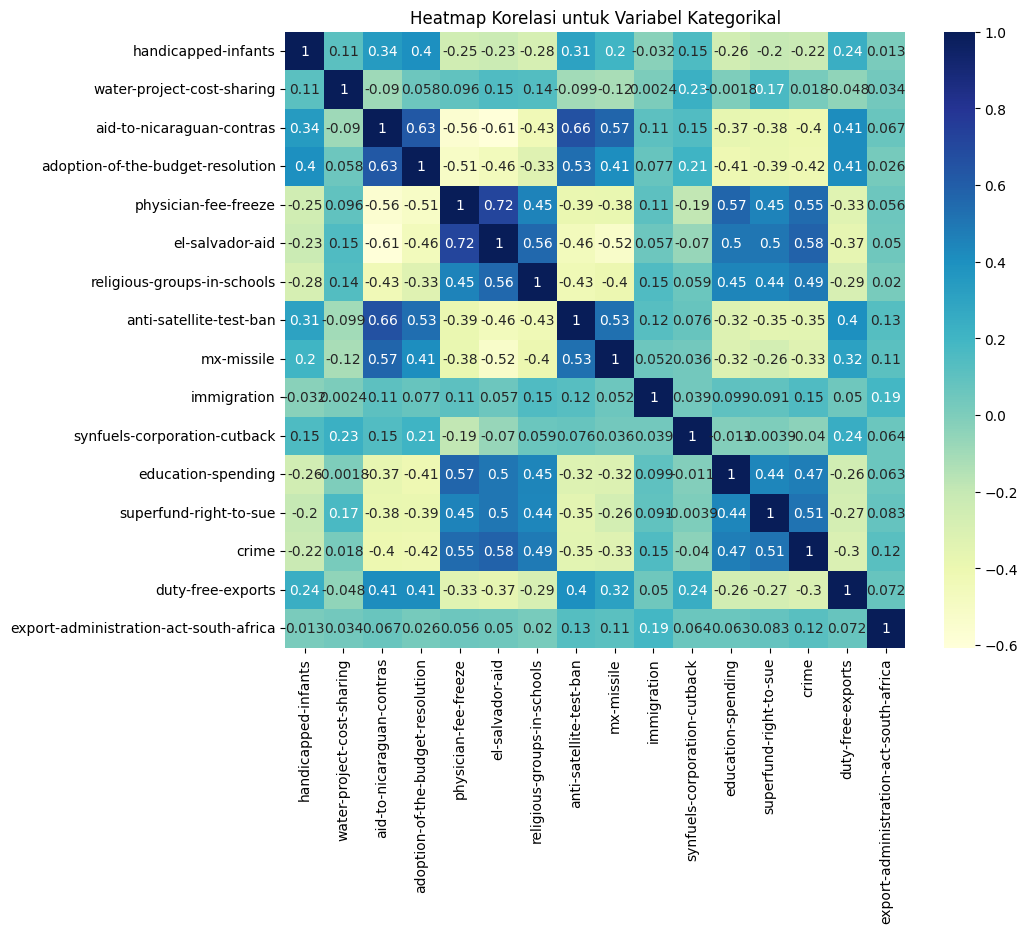

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat matriks kontingensi
contingency_matrix = df[categorical_columns].apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
contingency_matrix = contingency_matrix.corr()

# Visualisasi heatmap dari matriks kontingensi
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_matrix, annot=True, cmap='YlGnBu')
plt.title('Heatmap Korelasi untuk Variabel Kategorikal')
plt.show()


### Data Object To Numeric

In [68]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   handicapped-infants                     342 non-null    float64
 1   water-project-cost-sharing              342 non-null    float64
 2   adoption-of-the-budget-resolution       342 non-null    float64
 3   physician-fee-freeze                    342 non-null    float64
 4   el-salvador-aid                         342 non-null    float64
 5   religious-groups-in-schools             342 non-null    float64
 6   anti-satellite-test-ban                 342 non-null    float64
 7   aid-to-nicaraguan-contras               342 non-null    float64
 8   mx-missile                              342 non-null    float64
 9   immigration                             342 non-null    float64
 10  synfuels-corporation-cutback            342 non-null    float6

In [69]:
data_object = ['Class']
data_object

['Class']

In [70]:
labelencoder = LabelEncoder()
for i in data_object:
  df_new[i] = df_new[i].astype(str)
  df_new[i] = labelencoder.fit_transform(df_new[i])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   handicapped-infants                     342 non-null    float64
 1   water-project-cost-sharing              342 non-null    float64
 2   adoption-of-the-budget-resolution       342 non-null    float64
 3   physician-fee-freeze                    342 non-null    float64
 4   el-salvador-aid                         342 non-null    float64
 5   religious-groups-in-schools             342 non-null    float64
 6   anti-satellite-test-ban                 342 non-null    float64
 7   aid-to-nicaraguan-contras               342 non-null    float64
 8   mx-missile                              342 non-null    float64
 9   immigration                             342 non-null    float64
 10  synfuels-corporation-cutback            342 non-null    float6

### Handling Missing Value


In [71]:
df_new.isnull().sum()

handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
Class                                     0
dtype: int64

In [72]:
# Menghapus baris yang memiliki nilai yang hilang
df_new.dropna(inplace=True)

# Periksa kembali jumlah nilai yang hilang setelah penghapusan
df_new.isnull().sum()


handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
Class                                     0
dtype: int64

### Outlier Data

In [73]:
print("jumlah data dengan outliers", df_new.shape)

# Drop outliers
df_new = df_new[(np.abs(stats.zscore(df_new.select_dtypes(include=np.number))) < 3).all(axis=1)]

print("jumlah data tanpa outliers", df_new.shape)

# Reset index
df_new.reset_index(drop=True, inplace=True)
df_new

jumlah data dengan outliers (342, 17)
jumlah data tanpa outliers (342, 17)


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0,1.0,2.0,1
1,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,1
2,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,0
3,1.0,2.0,2.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,0
4,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1
338,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0
339,1.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1
340,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0,2.0,1


### Data Spliting

In [74]:
#dataset baru diekspor ke dalam csv terbaru
df_new.to_csv('clean_data.csv')

In [75]:
#Data Split
X = df_new.drop('Class',axis=1)
y = df_new['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.75, test_size = 0.25)

### Data Scaling

In [76]:
# #Data Scalling
# ss = StandardScaler()
# X_train_scaled = ss.fit_transform(X_train)
# X_test_scaled = ss.transform(X_test)

# Eksperimen TPOT Model

In [77]:
tpot = TPOTClassifier(generations=10, population_size=50, verbosity=2, n_jobs=1, cv=5, random_state =42)
tpot.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9530165912518853

Generation 2 - Current best internal CV score: 0.9530165912518853

Generation 3 - Current best internal CV score: 0.9530165912518853

Generation 4 - Current best internal CV score: 0.9530165912518853

Generation 5 - Current best internal CV score: 0.9530165912518853

Generation 6 - Current best internal CV score: 0.9530165912518853

Generation 7 - Current best internal CV score: 0.9530165912518853

Generation 8 - Current best internal CV score: 0.9530165912518853

Generation 9 - Current best internal CV score: 0.9607843137254901

Generation 10 - Current best internal CV score: 0.9607843137254901

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=1, max_features=0.6500000000000001, min_samples_leaf=13, min_samples_split=7, n_estimators=100, subsample=0.45)


TPOTClassifier(generations=10, population_size=50, random_state=42, verbosity=2)

In [78]:
print("Best pipeline:", tpot.fitted_pipeline_)
print("Accuracy is {}%".format(tpot.score(X_test, y_test)*100))

Best pipeline: Pipeline(steps=[('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=1,
                                            max_features=0.6500000000000001,
                                            min_samples_leaf=13,
                                            min_samples_split=7,
                                            random_state=42, subsample=0.45))])
Accuracy is 94.18604651162791%


In [79]:
tpot_eksperimen1 = TPOTClassifier(generations=15, population_size=100, verbosity=2, n_jobs=1, cv=5, random_state =42, config_dict='TPOT light')
tpot_eksperimen1.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/1600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9490950226244343

Generation 2 - Current best internal CV score: 0.9490950226244343

Generation 3 - Current best internal CV score: 0.9529411764705882

Generation 4 - Current best internal CV score: 0.9529411764705882

Generation 5 - Current best internal CV score: 0.9529411764705882

Generation 6 - Current best internal CV score: 0.9529411764705882

Generation 7 - Current best internal CV score: 0.9529411764705882

Generation 8 - Current best internal CV score: 0.9530165912518853

Generation 9 - Current best internal CV score: 0.9530165912518853

Generation 10 - Current best internal CV score: 0.9530165912518853

Generation 11 - Current best internal CV score: 0.9530165912518853

Generation 12 - Current best internal CV score: 0.9530165912518853

Generation 13 - Current best internal CV score: 0.9530165912518853

Generation 14 - Current best internal CV score: 0.9530165912518853

Generation 15 - Current best internal CV score: 0.953016

TPOTClassifier(config_dict='TPOT light', generations=15, random_state=42,
               verbosity=2)

In [80]:
print("Best pipeline:", tpot_eksperimen1.fitted_pipeline_)
print("Accuracy is {}%".format(tpot_eksperimen1.score(X_test, y_test)*100))

Best pipeline: Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer-1',
                                                 FunctionTransformer(func=<function copy at 0x7fb1480c5870>)),
                                                ('functiontransformer-2',
                                                 FunctionTransformer(func=<function copy at 0x7fb1480c5870>))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        min_samples_split=6,
                                        random_state=42))])
Accuracy is 94.18604651162791%


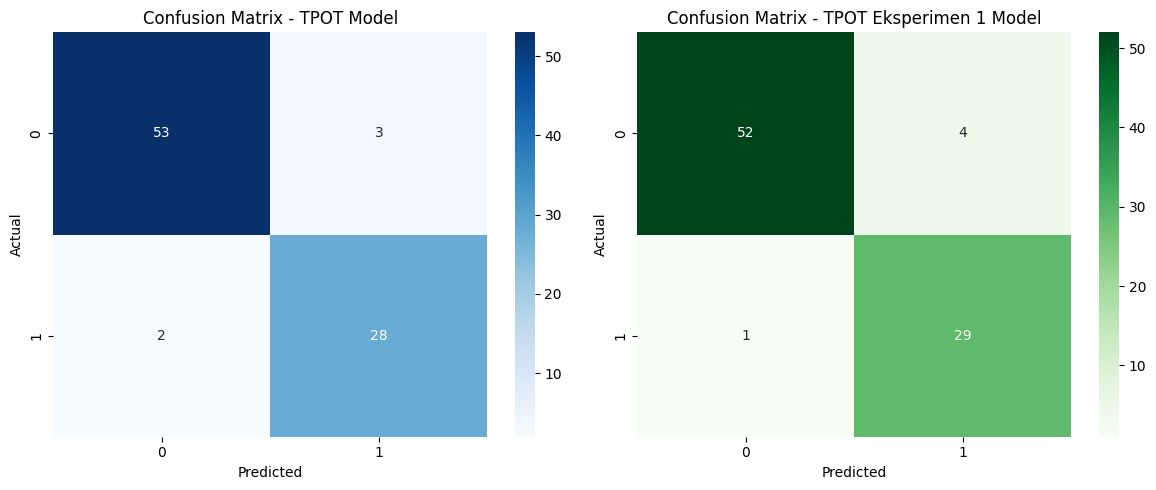

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prediksi dari model pertama
predictions_tpot = tpot.predict(X_test)

# Prediksi dari model eksperimen pertama
predictions_eksperimen1 = tpot_eksperimen1.predict(X_test)

# Confusion matrix untuk model pertama
conf_matrix_tpot = confusion_matrix(y_test, predictions_tpot)

# Confusion matrix untuk model eksperimen pertama
conf_matrix_eksperimen1 = confusion_matrix(y_test, predictions_eksperimen1)

# Visualisasi confusion matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_tpot, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - TPOT Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_eksperimen1, annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix - TPOT Eksperimen 1 Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


# Prediksi Data Test

In [115]:
import pandas as pd

url = "https://github.com/nanahsn/Pembelajaran-Mesin-Lanjut/raw/main/data_test.xlsx"
df_test = pd.read_excel(url, na_values='?', engine='openpyxl')
df_test.head()


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,b'n',b'y',b'n',b'y',b'y',b'y',b'n',b'n',b'n',b'y',b'?',b'y',b'y',b'y',b'n',b'y',b'republican'
1,b'n',b'y',b'n',b'y',b'y',b'y',b'n',b'n',b'n',b'n',b'n',b'y',b'y',b'y',b'n',b'?',b'republican'
2,b'?',b'y',b'y',b'?',b'y',b'y',b'n',b'n',b'n',b'n',b'y',b'n',b'y',b'y',b'n',b'n',b'democrat'
3,b'n',b'y',b'y',b'n',b'?',b'y',b'n',b'n',b'n',b'n',b'y',b'n',b'y',b'n',b'n',b'y',b'democrat'
4,b'y',b'y',b'y',b'n',b'y',b'y',b'n',b'n',b'n',b'n',b'y',b'?',b'y',b'y',b'y',b'y',b'democrat'


In [116]:
# Mengganti nilai b'?' menjadi NaN (missing value)
df_test.replace("b'?'", float('nan'), inplace=True)

# Membuat dictionary untuk mapping b'n' dan b'y' ke nilai float
mapping = {"b'n'": 0.0, "b'y'": 1.0}

# Loop untuk mengubah nilai b'n' dan b'y' menjadi float
for col in df_test.columns[:-1]:  # Mengabaikan kolom 'Class'
    if col != 'Class':
        df_test[col].replace(mapping, inplace=True)

# Tampilkan hasil
df_test.head()


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0,b'republican'
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,b'republican'
2,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,b'democrat'
3,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,b'democrat'
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0,b'democrat'


In [117]:
# Menghapus baris yang memiliki nilai yang hilang
df_test.dropna(inplace=True)

# Periksa kembali jumlah nilai yang hilang setelah penghapusan
df_test.isnull().sum()


handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
Class                                     0
dtype: int64

categories of (Class) --- 
 b'democrat'      29
b'republican'    23
Name: Class, dtype: int64
********************************************************************************************************************************************************************************************************


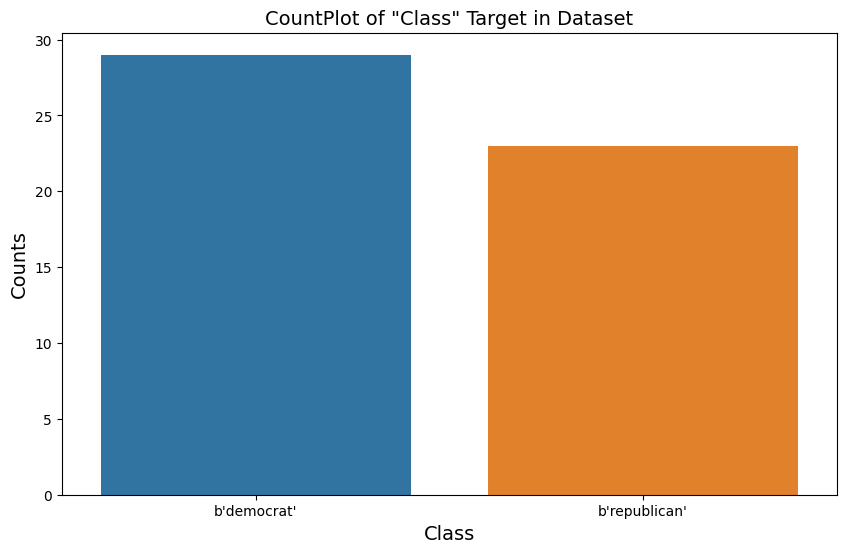

In [128]:
diagnosis_values = df_test['Class'].value_counts()
print('categories of (Class) --- \n', diagnosis_values)
print('**'*100)

plt.figure(figsize=(10, 6))
sns.countplot(x=df_test['Class'], data= df_test, order = diagnosis_values.index)
plt.title('CountPlot of "Class" Target in Dataset', fontsize=14, c = 'k')
plt.xlabel('Class', fontsize = 14, c ='k')
plt.ylabel('Counts', fontsize = 14, c ='k');